In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('AAPL_data.csv')

In [4]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,12-12-1980,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,15-12-1980,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,16-12-1980,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,17-12-1980,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,18-12-1980,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11084 non-null  object 
 1   Adj Close  11084 non-null  float64
 2   Close      11084 non-null  float64
 3   High       11084 non-null  float64
 4   Low        11084 non-null  float64
 5   Open       11084 non-null  float64
 6   Volume     11084 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 606.3+ KB
None


# Preprocessing the dataset for ARIMA model



In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print(data['Date'])

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
11079   2024-11-22
11080   2024-11-25
11081   2024-11-26
11082   2024-11-27
11083   2024-11-29
Name: Date, Length: 11084, dtype: datetime64[ns]


In [7]:
data.sort_values('Date', inplace=True)

In [8]:
data.set_index('Date', inplace=True)

In [9]:
close_data = data['Close']

In [10]:
close_data.head()

Date
1980-12-12    0.128348
1980-12-15    0.121652
1980-12-16    0.112723
1980-12-17    0.115513
1980-12-18    0.118862
Name: Close, dtype: float64

In [11]:
close_data.describe()

count    11084.000000
mean        23.891777
std         49.215566
min          0.049107
25%          0.300223
50%          0.539733
75%         21.060982
max        237.330002
Name: Close, dtype: float64

In [12]:
close_data.isnull().sum()

0

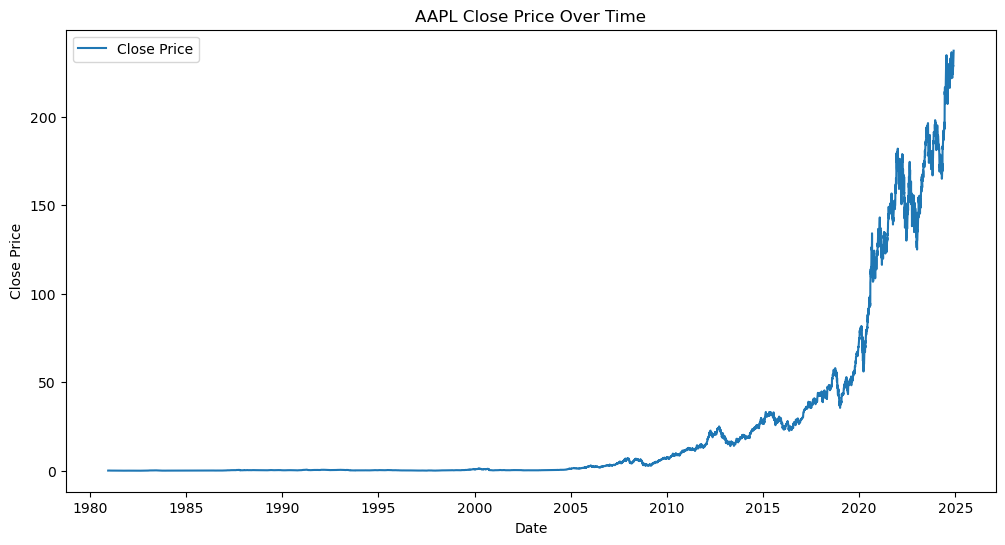

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Visualizing the 'Close' data over time
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Close Price')
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [14]:
#ADF tset
adf_test = adfuller(close_data)
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4],
}


In [15]:
adf_results

{'ADF Statistic': 4.227381260797084,
 'p-value': 1.0,
 'Critical Values': {'1%': -3.4309422510477696,
  '5%': -2.8618017424577933,
  '10%': -2.566909320386296}}

This suggests that the data is not stationary, and differencing is required to make it suitable for ARIMA modeling. 
we need to perform differencing until the data becomes stationary

In [16]:
# Perform differencing to make the data stationary
diff_close_data = close_data.diff().dropna()

In [17]:
# ADF test
adf_test_diff = adfuller(diff_close_data)
adf_diff_results = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4],
}


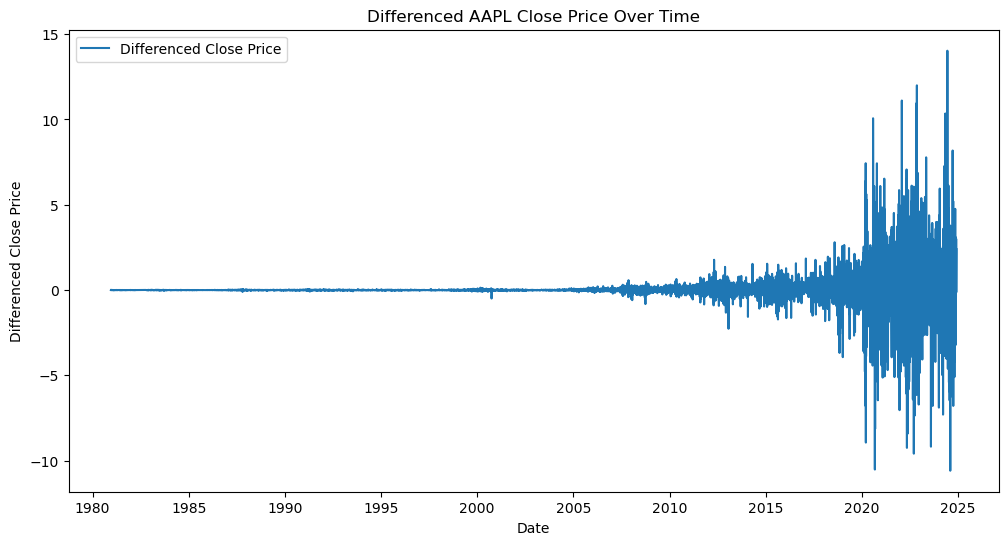

In [18]:
# Visualize the differenced data
plt.figure(figsize=(12, 6))
plt.plot(diff_close_data, label='Differenced Close Price')
plt.title('Differenced AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()




In [19]:
adf_diff_results

{'ADF Statistic': -17.7124674328066,
 'p-value': 3.497302036118693e-30,
 'Critical Values': {'1%': -3.4309423046915986,
  '5%': -2.8618017661630577,
  '10%': -2.5669093330045536}}

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

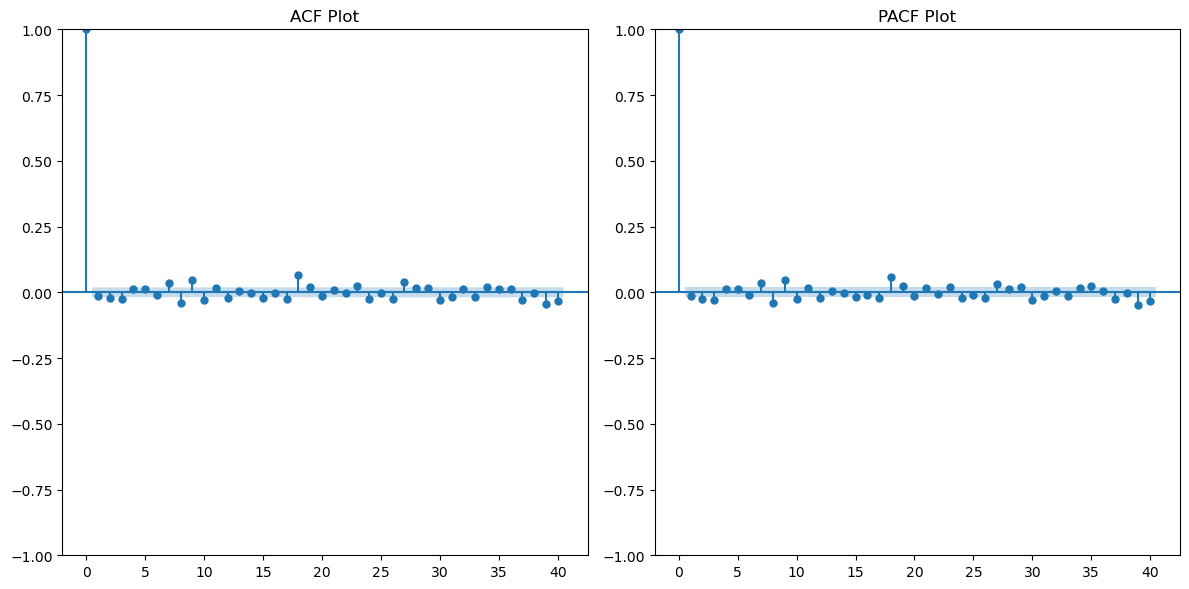

In [21]:
# ACF and PACF Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_close_data, ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(diff_close_data, ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, mean_absolute_error, mean_absolute_percentage_error

In [23]:
p, d, q = 2, 1, 2

In [24]:
# Fit the ARIMA model
arima_model = ARIMA(close_data, order=(p, d, q))
arima_result = arima_model.fit()

C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
# Summary of the model
arima_summary = arima_result.summary()

In [26]:
# Evaluate model performance
predictions = arima_result.fittedvalues[d:]  # Adjusting for differencing
actual_values = close_data[d:]


In [30]:
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predictions)
mae= mean_absolute_error(actual_values,predictions)
mape = mean_absolute_percentage_error(actual_values,predictions)

In [31]:
performance_metrics = {
    "MSE": mse,
    "RMSE": rmse,
    "R^2 Score": r2,
    "MAE":mae,
    "MAPE":mape
}

In [32]:
performance_metrics

{'MSE': 0.8693928406444108,
 'RMSE': 0.932412376925795,
 'R^2 Score': 0.9996410613519888,
 'MAE': 0.3071263229657444,
 'MAPE': 0.019106958508841046}

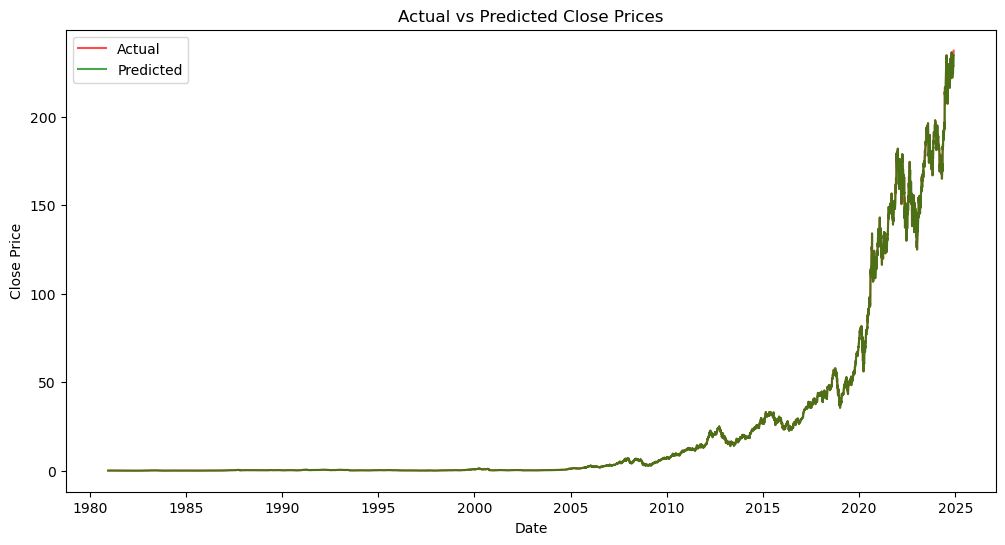

In [33]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual', alpha=0.7,color = 'red')
plt.plot(predictions, label='Predicted', alpha=0.7,color = 'green')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [34]:
arima_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                11084
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14950.508
Date:                Sat, 08 Feb 2025   AIC                          29911.016
Time:                        21:49:17   BIC                          29947.582
Sample:                             0   HQIC                         29923.330
                              - 11084                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7736      0.090      8.615      0.000       0.598       0.950
ar.L2         -0.5144      0.068     -7.561      0.000      -0.648      -0.381
ma.L1         -0.7881      0.091     -8.692      0.000      -0.966      -0.610
ma.L2          0.4968      0.070      7.054      0.000       0.359       0.635
sigma2         0.8694      0.003    322.924      0.000       0.864       0.875
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            620472.29
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):           35443.92   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Forecast the next 1000 days
forecast_steps = 1000
forecast_result = arima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()



C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ramsu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
# Create a new index for the forecast
last_date = close_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]

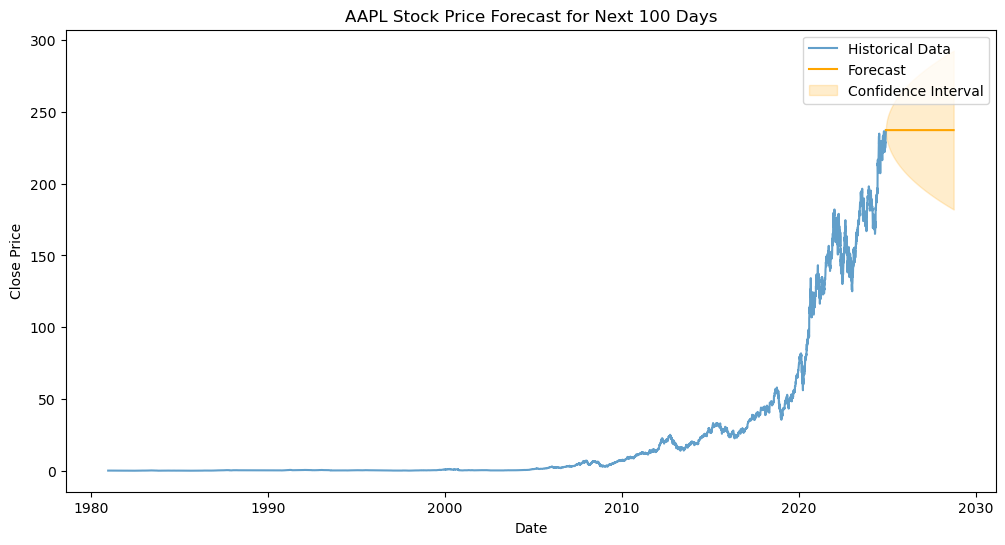

In [37]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Historical Data', alpha=0.7)
plt.plot(forecast_dates, forecast_values, label='Forecast', color='orange')
plt.fill_between(
    forecast_dates,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('AAPL Stock Price Forecast for Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [38]:
forecast_conf_int.index = forecast_dates
forecast_values.index = forecast_dates


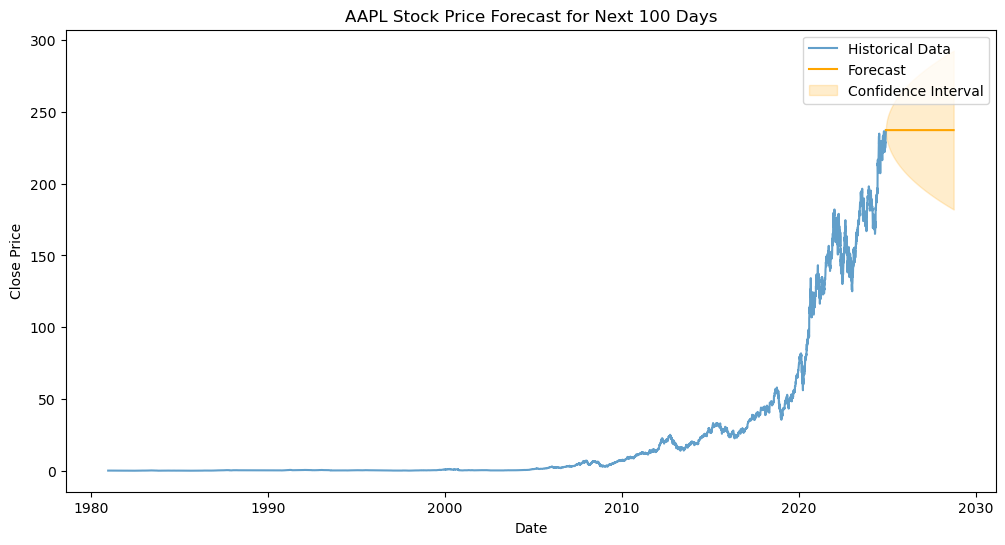

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Historical Data', alpha=0.7)
plt.plot(forecast_dates, forecast_values, label='Forecast', color='orange')
plt.fill_between(
    forecast_dates,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('AAPL Stock Price Forecast for Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [44]:
# Ensure forecast values and confidence intervals are properly converted to numeric
forecast_values = forecast_values.astype(float)
forecast_conf_int = forecast_conf_int.astype(float)

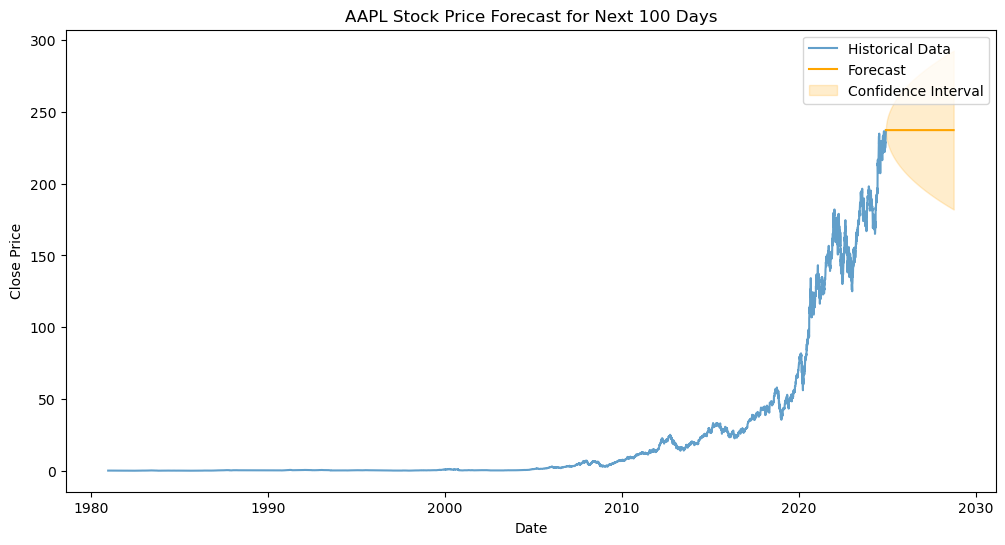

In [45]:
# Re-plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Historical Data', alpha=0.7)
plt.plot(forecast_dates, forecast_values, label='Forecast', color='orange')
plt.fill_between(
    forecast_dates,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('AAPL Stock Price Forecast for Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [46]:
# Inspect data types of forecasted values and confidence intervals
forecast_values_dtype = forecast_values.dtype
forecast_conf_int_dtypes = forecast_conf_int.dtypes

forecast_values_dtype, forecast_conf_int_dtypes


(dtype('float64'),
 lower Close    float64
 upper Close    float64
 dtype: object)

In [47]:
# Reset indices of forecast confidence intervals and forecast values
forecast_conf_int.reset_index(drop=True, inplace=True)
forecast_conf_int.index = forecast_dates

forecast_values = pd.Series(forecast_values.values, index=forecast_dates)

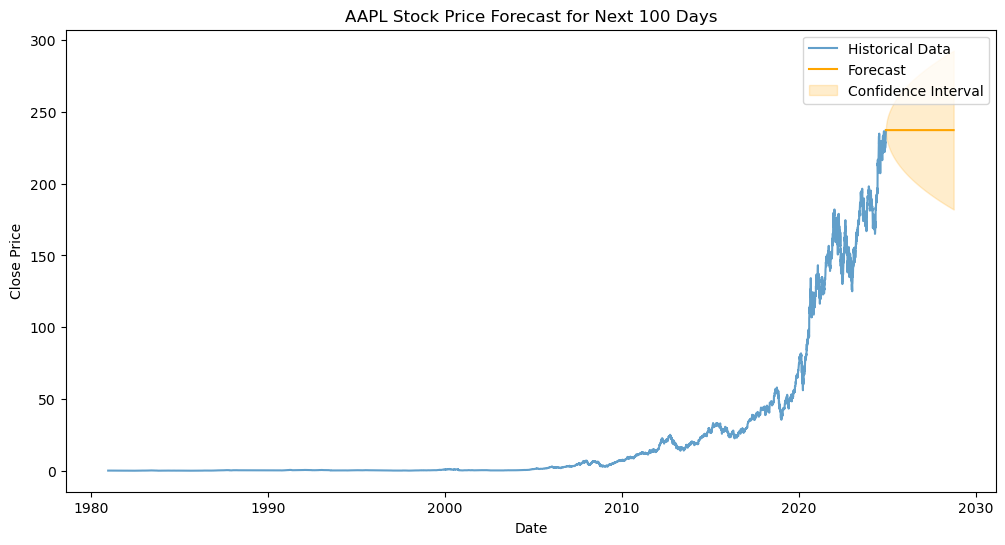

In [48]:
# Re-plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Historical Data', alpha=0.7)
plt.plot(forecast_dates, forecast_values, label='Forecast', color='orange')
plt.fill_between(
    forecast_dates,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('AAPL Stock Price Forecast for Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [49]:
# Inspect indices and lengths for consistency
forecast_values_index = forecast_values.index
forecast_conf_int_index = forecast_conf_int.index
forecast_dates_length = len(forecast_dates)
forecast_values_length = len(forecast_values)
forecast_conf_int_length = len(forecast_conf_int)

forecast_values_index, forecast_conf_int_index, forecast_dates_length, forecast_values_length, forecast_conf_int_length


(DatetimeIndex(['2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05',
                '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11',
                '2024-12-12', '2024-12-13',
                ...
                '2028-09-18', '2028-09-19', '2028-09-20', '2028-09-21',
                '2028-09-22', '2028-09-25', '2028-09-26', '2028-09-27',
                '2028-09-28', '2028-09-29'],
               dtype='datetime64[ns]', length=1000, freq='B'),
 DatetimeIndex(['2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05',
                '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11',
                '2024-12-12', '2024-12-13',
                ...
                '2028-09-18', '2028-09-19', '2028-09-20', '2028-09-21',
                '2028-09-22', '2028-09-25', '2028-09-26', '2028-09-27',
                '2028-09-28', '2028-09-29'],
               dtype='datetime64[ns]', length=1000, freq='B'),
 1000,
 1000,
 1000)

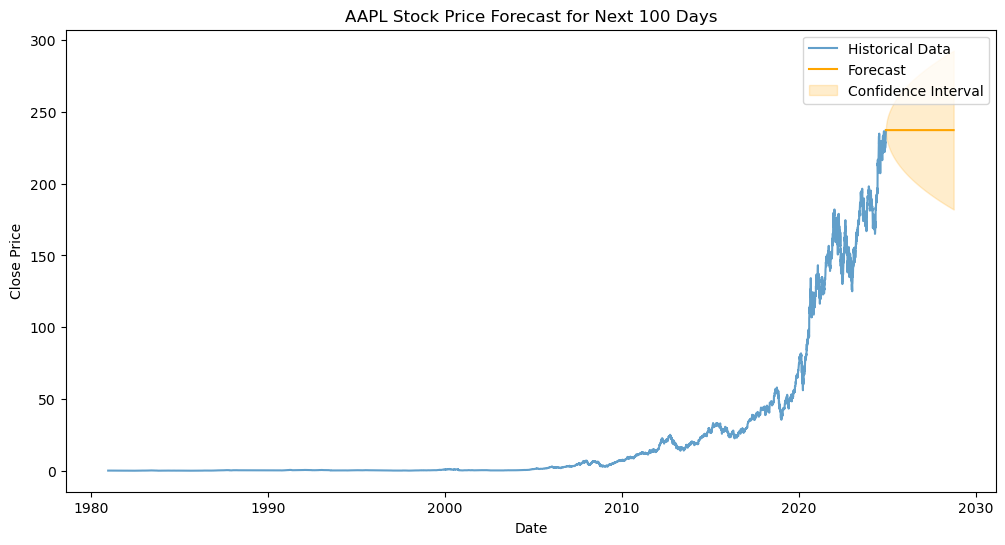

In [50]:
# Reattempt plotting with explicit validation
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Historical Data', alpha=0.7)
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='orange')
plt.fill_between(
    forecast_values.index,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('AAPL Stock Price Forecast for Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [51]:
forecast_conf_int = forecast_conf_int.apply(pd.to_numeric, errors='coerce')


In [52]:
invalid_conf_int_check = forecast_conf_int.isnull().sum()

invalid_forecast_values_check = forecast_values.isnull().sum()

invalid_conf_int_check, invalid_forecast_values_check


(lower Close    0
 upper Close    0
 dtype: int64,
 0)

In [53]:
# Inspect the content and data types of forecast_conf_int and forecast_values
forecast_conf_int_info = forecast_conf_int.dtypes
forecast_values_info = forecast_values.dtypes

# Display the first few rows of forecast_conf_int and forecast_values for validation
forecast_conf_int_preview = forecast_conf_int.head()
forecast_values_preview = forecast_values.head()

forecast_conf_int_info, forecast_conf_int_preview, forecast_values_info, forecast_values_preview


(lower Close    float64
 upper Close    float64
 dtype: object,
             lower Close  upper Close
 2024-12-02   235.450538   239.105446
 2024-12-03   234.684184   239.815704
 2024-12-04   234.150196   240.359805
 2024-12-05   233.723349   240.823334
 2024-12-06   233.336999   241.232860,
 dtype('float64'),
 2024-12-02    237.277992
 2024-12-03    237.249944
 2024-12-04    237.255001
 2024-12-05    237.273342
 2024-12-06    237.284929
 Freq: B, dtype: float64)

In [54]:
# Convert all data to numpy arrays for compatibility with matplotlib
forecast_values_array = forecast_values.values
lower_conf_array = forecast_conf_int.iloc[:, 0].values
upper_conf_array = forecast_conf_int.iloc[:, 1].values
forecast_dates_array = forecast_values.index



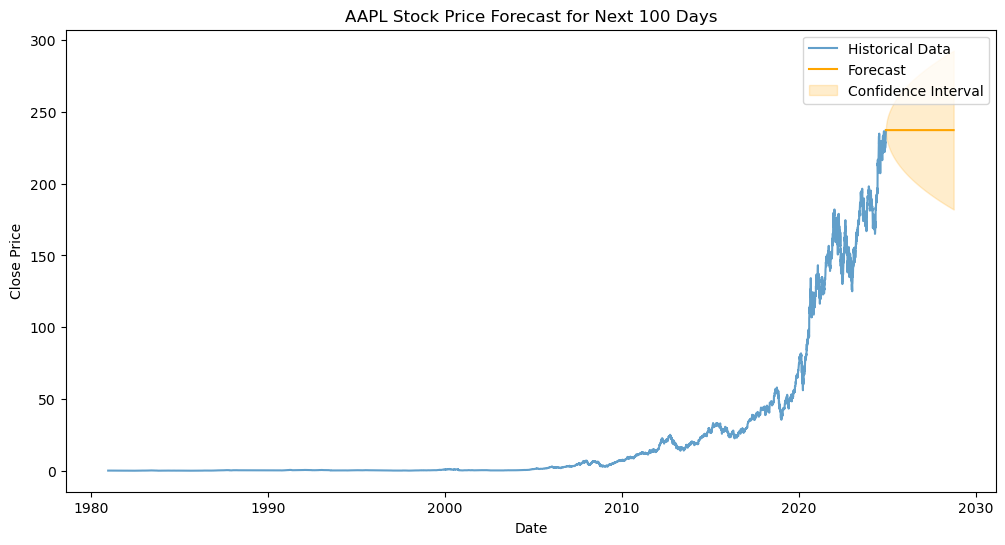

In [55]:
# Plot the forecast with numpy arrays
plt.figure(figsize=(12, 6))
plt.plot(close_data, label='Historical Data', alpha=0.7)
plt.plot(forecast_dates_array, forecast_values_array, label='Forecast', color='orange')
plt.fill_between(
    forecast_dates_array,
    lower_conf_array,
    upper_conf_array,
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('AAPL Stock Price Forecast for Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
